**This notebook provide the best practices to consume covid-lake API.**

In [5]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

#!pip install scipy
from scipy.stats import pearsonr

In [6]:
# Plotting functions
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[ANALISE-EXPLORATORIA]/python_plotting_functions.ipynb

In [7]:
path = '"covid-raw".transparencia."breath_disease"."death_by_city_and_skin__2020.08.04.23.08.15.parquet"' # path from Dremio

# query = "SELECT * FROM {0};".format (path)
# query

In [9]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()

# THIS QUERY WORKS, BUT YOU MUST TYPE IT CORRECTLY, WHICH IS HARD BECAUSE OF THE PARENTHESES
df = dremio.querySQL("""SELECT * FROM "covid-raw".transparencia."breath_disease"."death_by_city_and_skin__2020.08.04.23.08.15.parquet";""")
df.head(2)

,city,UF,skin_color,disease,2020,2019,created_at,__index_level_0__
0,São Paulo,SP,AMARELA,OUTRAS,27.0,35.0,04-08-2020 19:28,0
1,São Paulo,SP,AMARELA,COVID,1.0,NaN,04-08-2020 19:28,1


In [10]:
# Rodrigo,abaixo está o Relatório completo com todas informações do banco.
relatorio = pp.ProfileReport(df)


     |████████████████████████████████| 259 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 599 kB 26.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 51.7 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 291 kB 57.5 MB/s eta 0:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=cdd268a23a4c1ba2a22d14cf8e47582257159891aab54b3e485445ac20bc94e3
  Stored in directory: /home/ubuntu/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=8275acce7ec5510036a4f12ee04440388c17d5aff854239b780cee8b3a930e17
  Stored in directory: /home/ubuntu/.cache/pip/wheels/16/72/b0/e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash


In [7]:
df.dtypes

city                  object
UF                    object
skin_color            object
disease               object
2020                 float64
2019                 float64
created_at            object
__index_level_0__      int64
dtype: object

/home/ubuntu/anaconda/lib/python3.7/site-packages/pandas_profiling/profile_report.py:251: UserWarning: Extension .15 not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


In [9]:
df.shape

(7804, 8)

### Let's play with Data :)

- **Analyzing brasil.io dataset**

Checking all columns

In [10]:
all_columns = df.columns.values.tolist()
len(all_columns)
#all_columns

8

In [11]:
all_columns

['city',
 'UF',
 'skin_color',
 'disease',
 '2020',
 '2019',
 'created_at',
 '__index_level_0__']

Verifying all NAs

In [12]:
# count NAs per column
#df.isnull().sum()
df.isna().sum()

city                    0
UF                      0
skin_color              0
disease                 0
2020                 2634
2019                 3071
created_at              0
__index_level_0__       0
dtype: int64

Dropping all NAs

In [13]:
# shows all NAs
#df.isna()

# remove columns full of NAs
df = df.dropna(axis=1,how='all')
df.head()

,city,UF,skin_color,disease,2020,2019,created_at,__index_level_0__
0,São Paulo,SP,AMARELA,OUTRAS,27.0,35.0,04-08-2020 19:28,0
1,São Paulo,SP,AMARELA,COVID,1.0,NaN,04-08-2020 19:28,1
2,São Paulo,SP,AMARELA,INDETERMINADA,1.0,2.0,04-08-2020 19:28,2
3,São Paulo,SP,AMARELA,PNEUMONIA,2.0,5.0,04-08-2020 19:28,3
4,São Paulo,SP,AMARELA,SRAG,2.0,NaN,04-08-2020 19:28,4


In [14]:
df.shape

(7804, 8)

Verifying the duplicated columns

In [15]:
# drop duplicates
df = df.drop_duplicates() 
df.head()
# no duplicates

,city,UF,skin_color,disease,2020,2019,created_at,__index_level_0__
0,São Paulo,SP,AMARELA,OUTRAS,27.0,35.0,04-08-2020 19:28,0
1,São Paulo,SP,AMARELA,COVID,1.0,NaN,04-08-2020 19:28,1
2,São Paulo,SP,AMARELA,INDETERMINADA,1.0,2.0,04-08-2020 19:28,2
3,São Paulo,SP,AMARELA,PNEUMONIA,2.0,5.0,04-08-2020 19:28,3
4,São Paulo,SP,AMARELA,SRAG,2.0,NaN,04-08-2020 19:28,4


In [16]:
df.shape

(7804, 8)

Shows all the data, though it runs quite slow for big datasets

In [17]:
#force_show_all_columns(df)

Describe the dataset

In [18]:
df.describe()

,2020,2019,__index_level_0__
count,5170.000000,4733.000000,7804.000000
mean,4.150097,4.222480,0.677858
std,24.140178,24.877853,1.133198
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,3.000000,3.000000,1.000000
max,1218.000000,1241.000000,6.000000


Describe the fields

In [24]:
df['city'].describe()

count          7804
unique         2926
top       São Paulo
freq             28
Name: city, dtype: object

In [25]:
df['city'].unique()


array(['São Paulo', 'São Bernardo do Campo', 'Sumare', ...,
       'Abel Figueiredo', 'Santa Carmem', 'Pombos'], dtype=object)

In [20]:
df['UF'].describe()

count     7804
unique      27
top         SP
freq      1385
Name: UF, dtype: object

In [26]:
df['UF'].unique()
#list(df['state'].unique())

array(['SP', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA',
       'MS', 'MT', 'PA', 'PB', 'PE', 'TO', 'PI', 'PR', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'RJ', 'MG'], dtype=object)

Frequency of each state

In [27]:
# array with each count    
counts = np.unique(df['UF'], return_counts=True)

# dataframe
state_count = pd.DataFrame({'UF': counts[0], 'freq': counts[1]})
state_count.sort_values(by=['freq'], inplace=True,ascending=False)
state_count.head()

,UF,freq
25,SP,1385
10,MG,990
5,CE,583
22,RS,511
8,GO,458


In [28]:
state_count.tail()

,UF,freq
2,AM,50
6,DF,47
0,AC,47
3,AP,28
21,RR,12


Frequency of each city

In [29]:
# array with each count    
counts = np.unique(df['city'], return_counts=True)

# dataframe
region_count = pd.DataFrame({'city': counts[0], 'freq': counts[1]})
region_count.sort_values(by=['freq'], inplace=True,ascending=False)
region_count.head()

,city,freq
2628,São Paulo,28
778,Curitiba,26
2243,Rio de Janeiro,26
2707,Tatui,26
770,Cuiaba,25


In [30]:
region_count.tail()

,city,freq
1888,Paramoti,1
1887,Paramirim,1
1886,Parambu,1
1885,Paraisópolis,1
2925,Áurea,1


Descriptive analysis

In [31]:
df['disease'].describe()

count       7804
unique         7
top       OUTRAS
freq        4527
Name: disease, dtype: object

In [32]:
df['disease'].describe()

count       7804
unique         7
top       OUTRAS
freq        4527
Name: disease, dtype: object

## Graphs

#### Showing the null values

In [33]:
df

,city,UF,skin_color,disease,2020,2019,created_at,__index_level_0__
0,São Paulo,SP,AMARELA,OUTRAS,27.0,35.0,04-08-2020 19:28,0
1,São Paulo,SP,AMARELA,COVID,1.0,NaN,04-08-2020 19:28,1
2,São Paulo,SP,AMARELA,INDETERMINADA,1.0,2.0,04-08-2020 19:28,2
3,São Paulo,SP,AMARELA,PNEUMONIA,2.0,5.0,04-08-2020 19:28,3
4,São Paulo,SP,AMARELA,SRAG,2.0,NaN,04-08-2020 19:28,4
...,...,...,...,...,...,...,...,...
7799,Santa Carmem,MT,BRANCA,OUTRAS,2.0,NaN,04-08-2020 20:52,0
7800,Cachoeirinha,PE,PARDA,OUTRAS,1.0,2.0,04-08-2020 20:52,0
7801,Cachoeirinha,PE,PRETA,OUTRAS,NaN,1.0,04-08-2020 20:52,0
7802,Pombos,PE,BRANCA,OUTRAS,NaN,1.0,04-08-2020 20:52,0


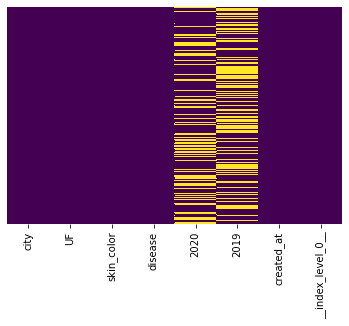

In [34]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
# For more details
display(df.isnull().sum().sort_values(ascending=False))

2019                 3071
2020                 2634
__index_level_0__       0
created_at              0
disease                 0
skin_color              0
UF                      0
city                    0
dtype: int64

#### Looking for correlations

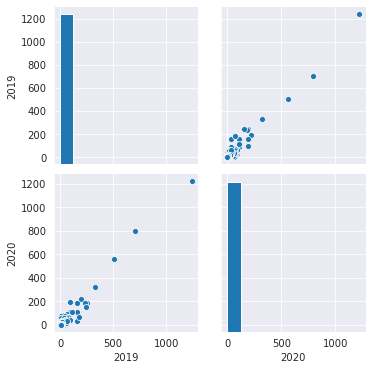

In [37]:
columns = [
    '2019',	 
    '2020'
]
sns.set_style("darkgrid")
sns.pairplot(df[columns])

### Conclusion

There is a lot of missing data, but the variety of diseases researched in the dataset allows comparisons and time series analyses.

## *Developed by*

 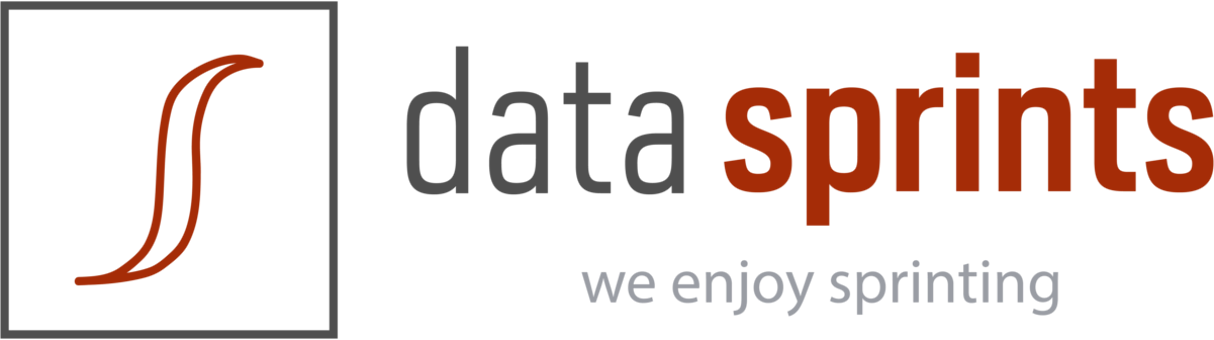